In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D

from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import regularizers

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GRU
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot

In [4]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

In [5]:
Final = pd.read_csv("Concatnated.csv")

In [6]:
Final.shape

(292986, 447)

In [7]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [8]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]

In [9]:
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [10]:
X = Final[:, :446]
y = Final[:,446]

In [11]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [12]:
pd.value_counts(y)

0.0    146493
1.0     48831
2.0     48831
3.0     47845
dtype: int64

In [12]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :446])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 291999:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

291990
291990


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [37]:
'''y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)'''

'y_train = to_categorical(y_train, 4)\ny_test = to_categorical(y_test, 4)'

In [16]:
print(y_train[0])
print(y_test[64])
print(y_train[2345])
print(y_test[97])

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]


In [15]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 1, 446))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 446))

In [18]:
print(X_train[0])
print('\n')
print(y_train[0])

[[7.14689215e-03 9.62910784e-03 4.75727708e-02 7.85996550e-02
  1.49367441e-02 6.50085187e-02 1.10669916e-02 1.69698702e-03
  3.84030160e-02 1.87789489e-02 2.90905265e-02 8.49726677e-03
  3.23776213e-02 3.24957645e-02 2.02707275e-04 2.07940721e-02
  2.66403829e-03 2.70937482e-03 8.13213707e-04 1.93268971e-03
  3.45358455e-04 1.80238810e-02 8.44224900e-04 9.08678765e-03
  4.98960405e-03 2.48726588e-03 2.24957801e-01 4.20649893e-04
  8.58254881e-02 3.16880482e-03 1.54613192e-02 1.07037083e-02
  1.82240795e-02 8.40992427e-02 1.14082201e-01 3.33706492e-03
  5.79766806e-03 5.50281710e-04 1.74180124e-03 4.00401061e-02
  1.02850570e-02 3.27689871e-04 2.45961147e-04 1.17234960e-03
  1.10060192e-03 3.01238759e-04 4.50513210e-04 2.42482133e-03
  1.62400488e-01 2.21959553e-01 9.19634252e-02 3.29834595e-01
  9.47875731e-02 3.22920527e-01 1.64339318e-01 2.03369593e-01
  4.87065822e-02 6.34958978e-03 1.16339871e-01 1.73939387e-01
  8.70909955e-02 5.56887379e-01 1.14058059e-01 1.62487675e-01
  1.2242

In [19]:
X_train.shape

(277400, 1, 446)

In [20]:
model = Sequential()
model.add(GRU(128, activation='tanh', kernel_regularizer=regularizers.l2(0.00), 
               input_shape=(X_train.shape[1], X_train.shape[2]), 
               return_sequences=True))
model.add(GRU(64, activation='tanh', return_sequences=True))
model.add(GRU(32, activation='tanh', return_sequences=False))

model.add(RepeatVector(1))

model.add(GRU(32, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.add(GRU(64, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.add(GRU(128, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            221184    
                                                                 
 gru_1 (GRU)                 (None, 1, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 32)            0         
 )                                                               
                                                                 
 gru_3 (GRU)                 (None, 1, 32)             6336      
                                                                 
 time_distributed (TimeDistr  (None, 1, 446)           14718     
 ibuted)                                                

In [21]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1autoencoder.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [22]:
history = model.fit(X_train, X_train,
                    epochs=150,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/150
2168/2168 [==============================] - 22s 8ms/step - loss: 0.0030 - accuracy: 0.0580 - val_loss: 0.0026 - val_accuracy: 0.0762
Epoch 2/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0026 - accuracy: 0.0787 - val_loss: 0.0024 - val_accuracy: 0.0836
Epoch 3/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0023 - accuracy: 0.0998 - val_loss: 0.0022 - val_accuracy: 0.1709
Epoch 4/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0021 - accuracy: 0.1595 - val_loss: 0.0020 - val_accuracy: 0.1737
Epoch 5/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0019 - accuracy: 0.1859 - val_loss: 0.0018 - val_accuracy: 0.1965
Epoch 6/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0017 - accuracy: 0.1931 - val_loss: 0.0015 - val_accuracy: 0.2006
Epoch 7/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0014 - accuracy: 0.2191 - val_loss: 0.0013 -

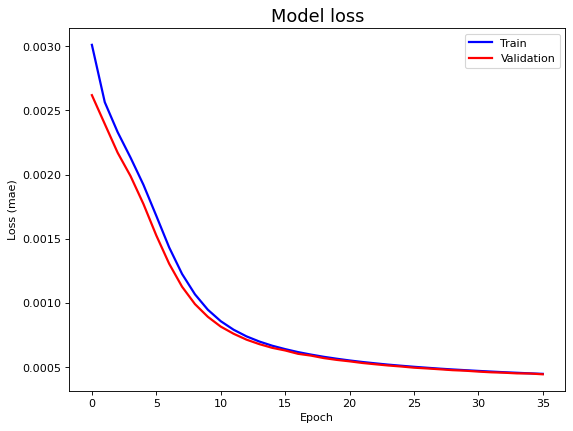

In [23]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [16]:
from keras.models import load_model
model = tf.keras.models.load_model("1autoencoder.h5")

In [17]:
test_x_predictions = model.predict(X_train)

In [18]:
test_x_predictions.shape

(277400, 1, 446)

In [19]:
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 446))
predictions_reshape = np.reshape(test_x_predictions, (test_x_predictions.shape[0], 446))

In [21]:
mse = np.mean(np.power(X_train_reshape - predictions_reshape, 2), axis=1)

In [22]:
mse.shape

(277400,)

In [25]:
error_df = pd.concat([pd.DataFrame(mse),pd.DataFrame(y_train)], ignore_index=True, axis=1)
error_df.columns = ['Reconstruction_error', 'True_class']

In [39]:
normal = np.array(error_df[error_df['True_class'] == float(0.0)])
DoS = np.array(error_df[error_df['True_class'] == float(1.0)])
Fuzz = np.array(error_df[error_df['True_class'] == float(2.0)])
Replay = np.array(error_df[error_df['True_class'] == float(3.0)])

In [64]:
print(max(normal[:,0]))
print(min(normal[:,0]))
print(normal[:,0].mean())

0.01070173362800247
1.0290645652233826e-06
5.856950807288673e-05


In [65]:
print(max(DoS[:,0]))
print(min(DoS[:,0]))
print(DoS[:,0].mean())

0.002688094643869633
4.505643635572588e-05
0.001456169491932355


In [66]:
print(max(Fuzz[:,0]))
print(min(Fuzz[:,0]))
print(Fuzz[:,0].mean())

0.00636286829939366
0.000541671525892088
0.001040249511524978


In [67]:
print(max(Replay[:,0]))
print(min(Replay[:,0]))
print(Replay[:,0].mean())

3.545794286468845e-05
1.0935909849780009e-06
5.37078792762091e-06


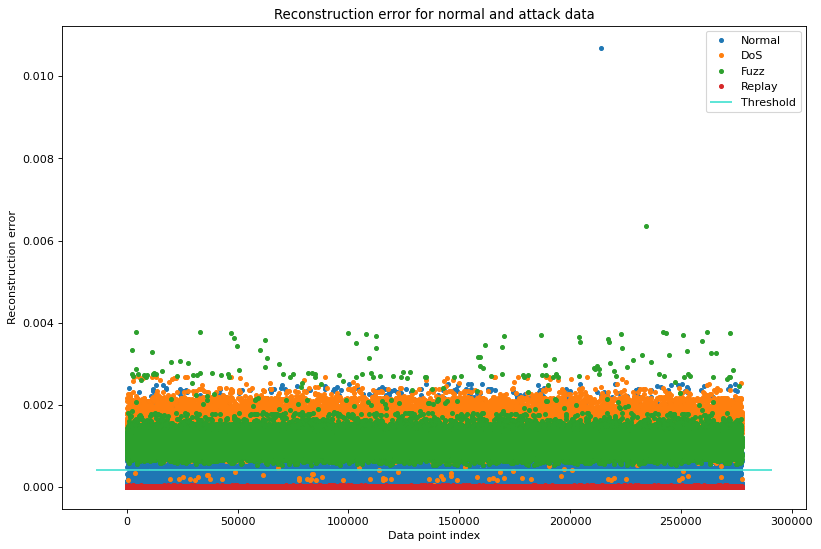

In [72]:
threshold_fixed = 0.0004
groups = error_df.groupby('True_class')

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
for name, group in groups:
    
    temp = ""
    if name == 0.0:
        temp= "Normal" 
    elif name == 1.0:
        temp= "DoS"
    elif name == 2.0:
        temp= "Fuzz"
    else:
        temp= "Replay"
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',  label = temp  )
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="turquoise", zorder=100, label='Threshold')

ax.legend()
plt.title("Reconstruction error for normal and attack data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

Explained variance ratio (first two components): [0.38478667 0.07462449]


<Figure size 432x288 with 0 Axes>

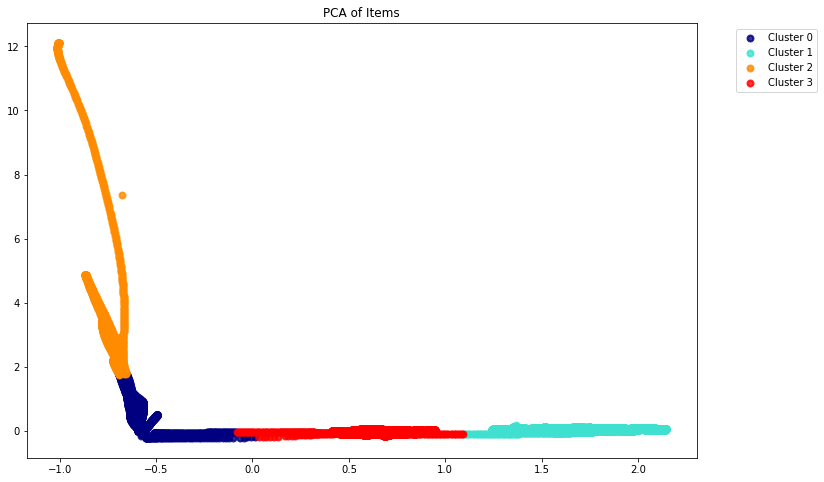

In [68]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(predictions_reshape)

predictions = kmeans.predict(predictions_reshape)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = predictions_reshape
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

In [70]:
test_predictions = model.predict(X_test)
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 446))
predictions_reshape_test = np.reshape(test_predictions, (test_predictions.shape[0], 446))

Explained variance ratio (first two components): [0.3835688 0.0812192]


<Figure size 432x288 with 0 Axes>

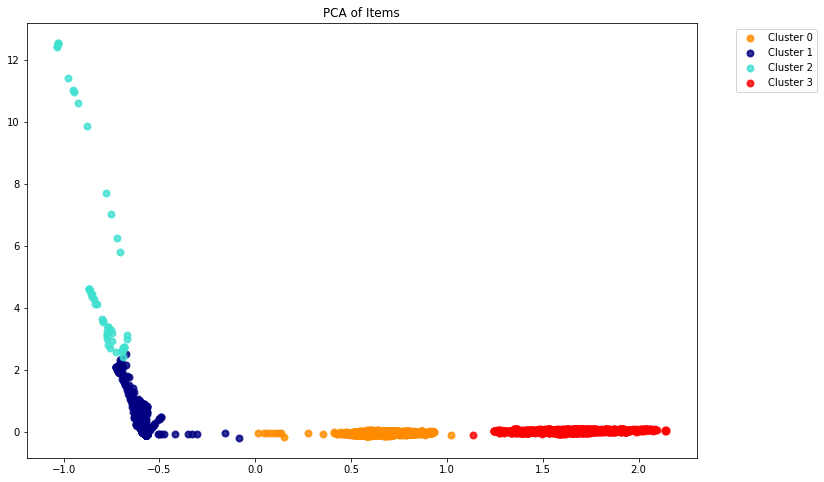

In [75]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(predictions_reshape_test)

predictions = kmeans.predict(predictions_reshape_test)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = predictions_reshape_test
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['darkorange', 'navy', 'turquoise', 'red', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()